In [2]:
import torch 
import os
import matplotlib.pyplot as plt
import sys
sys.path.append("/root/daehyeonchoi/brats/wavediffseg/wavelets")
from DWT_IDWT_Layers import DWT_2D, IDWT_2D


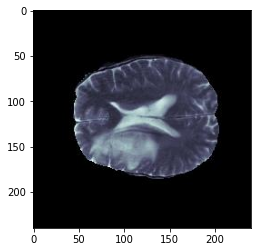

In [24]:
from PIL import Image
import numpy as np


image_dir = "/root/daehyeonchoi/brats/wavediffseg/data_process/dataset/BraTS2021/visualize"

image_types = ["visualize_flair.jpg", "visualize_t1.jpg", "visualize_t1ce.jpg", "visualize_t2.jpg"]

for image in image_types: 
    
    image_path = os.path.join(image_dir, image)
    image_pil = Image.open(image_path)
    # 이미지를 numpy 배열로 변환
    image_np = np.array(image_pil)
    plt.imshow(image_np)
    image_tensor = torch.from_numpy(image_np).permute(2, 0, 1).float() 


torch.Size([240, 240, 1])
tensor(255, dtype=torch.uint8)
tensor(0, dtype=torch.uint8)
torch.Size([240, 240, 1])
tensor(255, dtype=torch.uint8)
tensor(0, dtype=torch.uint8)
torch.Size([240, 240, 1])
tensor(255, dtype=torch.uint8)
tensor(0, dtype=torch.uint8)
torch.Size([240, 240, 1])
tensor(255, dtype=torch.uint8)
tensor(0, dtype=torch.uint8)


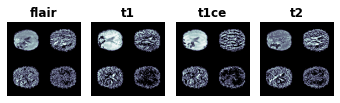

In [25]:
from PIL import Image
import numpy as np
dwt = DWT_2D("haar")
iwt = IDWT_2D("haar")

image_dir = "/root/daehyeonchoi/brats/wavediffseg/data_process/dataset/BraTS2021/visualize"

image_types = ["visualize_flair.jpg", "visualize_t1.jpg", "visualize_t1ce.jpg", "visualize_t2.jpg"]


for i, image in enumerate(image_types): 
    
    image_path = os.path.join(image_dir, image)
    image_pil = Image.open(image_path)
    image_pil = image_pil.convert("L")
    image_np = np.expand_dims(np.array(image_pil), axis=2)
    x = torch.from_numpy(image_np).permute(2, 0, 1).float() 
    plt.subplot(1,5,i+1)
    
    xll, xlh, xhl, xhh = dwt(torch.unsqueeze(x, axis=0))
    
    xll_xlh = torch.cat((xll, xlh), dim=2) 
    xhl_xhh = torch.cat((xhl, xhh), dim=2) 
    alls = torch.cat((xll_xlh, xhl_xhh), dim=3)
    
    alls = torch.squeeze(alls, dim=0).permute(1, 2, 0).type(torch.FloatTensor).byte()
    print(alls.shape)
    print(alls.max())
    print(alls.min())
    title=image[10:-4]
    plt.title(title,fontweight='bold')
    plt.axis(False)
    plt.imshow(alls, cmap='bone')  # cmap='gray'로 그레이스케일 색상 맵 사용

plt.tight_layout()
plt.show()
    
   

torch.float32
torch.Size([240, 240, 1])
tensor(255.)
tensor(0.)
torch.float32
torch.Size([240, 240, 1])
tensor(255.)
tensor(0.)
torch.float32
torch.Size([240, 240, 1])
tensor(255.)
tensor(0.)
torch.float32
torch.Size([240, 240, 1])
tensor(255.)
tensor(0.)


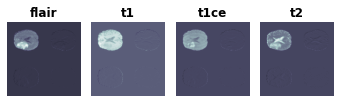

In [36]:
from PIL import Image
import numpy as np
dwt = DWT_2D("haar")
iwt = IDWT_2D("haar")

image_dir = "/root/daehyeonchoi/brats/wavediffseg/data_process/dataset/BraTS2021/visualize"

image_types = ["visualize_flair.jpg", "visualize_t1.jpg", "visualize_t1ce.jpg", "visualize_t2.jpg"]

image_path = os.path.join(image_dir, image)
image_pil = Image.open(image_path)
image_pil = image_pil.convert("L")

image_np = np.expand_dims(np.array(image_pil), axis=2)

for i, image in enumerate(image_types): 
    
    image_path = os.path.join(image_dir, image)
    image_pil = Image.open(image_path)
    image_pil = image_pil.convert("L")
    image_np = np.expand_dims(np.array(image_pil), axis=2)
    image_np = image_np.astype(float)
    x = torch.from_numpy(image_np).permute(2, 0, 1).float() 
    plt.subplot(1,5,i+1)
    
    xll, xlh, xhl, xhh = dwt(torch.unsqueeze(x, axis=0))
    
    xll_xlh = torch.cat((xll, xlh), dim=2) 
    xhl_xhh = torch.cat((xhl, xhh), dim=2) 
    alls = torch.cat((xll_xlh, xhl_xhh), dim=3)
    
    alls = torch.squeeze(alls, dim=0).permute(1, 2, 0).type(torch.FloatTensor)
    print(alls.dtype)
    print(alls.shape)
    alls = 255*(alls - alls.min()) / (alls.max() - alls.min())
    print(alls.max())
    print(alls.min())
    title=image[10:-4]
    plt.title(title,fontweight='bold')
    plt.axis(False)
    plt.imshow(alls, cmap='bone')  # cmap='gray'로 그레이스케일 색상 맵 사용

plt.tight_layout()
plt.show()
    
   

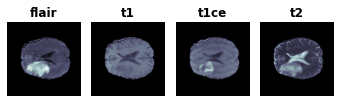

In [35]:
from PIL import Image
import numpy as np
dwt = DWT_2D("haar")
iwt = IDWT_2D("haar")

image_dir = "/root/daehyeonchoi/brats/wavediffseg/data_process/dataset/BraTS2021/visualize"

image_types = ["visualize_flair.jpg", "visualize_t1.jpg", "visualize_t1ce.jpg", "visualize_t2.jpg"]

for i, image in enumerate(image_types): 
    plt.subplot(1,5,i+1)
    
    image_path = os.path.join(image_dir, image)
    image_pil = Image.open(image_path)
    image_pil = image_pil.convert("L")
    image_np = np.expand_dims(np.array(image_pil), axis=2)
    title=image[10:-4]
    plt.title(title,fontweight='bold')
    plt.axis(False)
    plt.imshow(image_np, cmap='bone')  # cmap='gray'로 그레이스케일 색상 맵 사용

plt.tight_layout()
plt.show()
    
   